In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../DATA/wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
df['quality'].value_counts(), df['quality'].unique()

(Legit    6251
 Fraud     246
 Name: quality, dtype: int64,
 array(['Legit', 'Fraud'], dtype=object))

<AxesSubplot:xlabel='type', ylabel='count'>

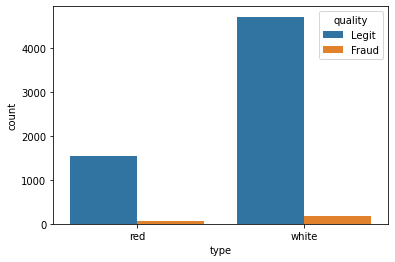

In [8]:
sns.countplot(x='type', data=df, hue='quality')

In [14]:
red_fraud = len(df[(df['quality'] == 'Fraud') & (df['type'] == 'red')])

In [16]:
total_red = len(df[df['type'] == 'red'])

In [17]:
percentage_red_fraud = (red_fraud * 100) / total_red

In [20]:
print("Percentage of fraud in red wines is " + str(percentage_red_fraud))

Percentage of fraud in red wines is 3.9399624765478425


In [21]:
white_fraud = len(df[(df['type'] == 'white') & (df['quality'] == 'Fraud')])

In [22]:
total_white = len(df[df['type'] == 'white'])

In [23]:
percentage_white_fraud = (white_fraud * 100) / total_white

In [24]:
print("Percentage of fraud in white wines is " + str(percentage_white_fraud))

Percentage of fraud in white wines is 3.736218864842793


In [25]:
df['quality'] = df['quality'].apply(lambda x : 1 if x == 'Fraud' else 0)

In [28]:
df['quality'].value_counts()

0    6251
1     246
Name: quality, dtype: int64

C:\Users\Shreyash\AppData\Local\Temp\ipykernel_4620\3192885367.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['quality'][:-1].sort_values().plot(kind='bar')


<AxesSubplot:>

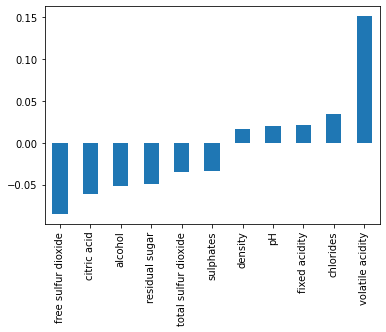

In [50]:
df.corr()['quality'][:-1].sort_values().plot(kind='bar')

C:\Users\Shreyash\AppData\Local\Temp\ipykernel_4620\3135645621.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr())


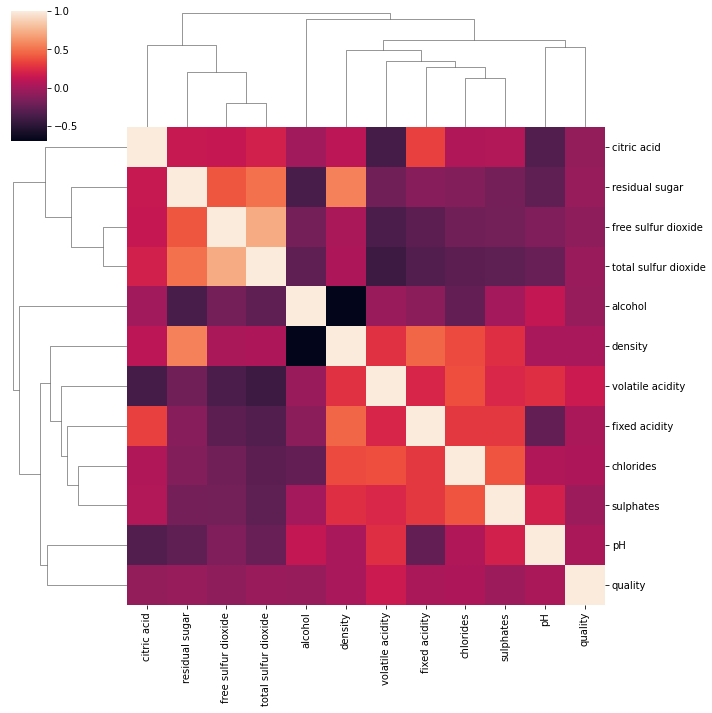

In [51]:
sns.clustermap(df.corr())

### Machine Learning Model

In [53]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [54]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


In [55]:
y = df['quality']

In [56]:
X = df.drop('quality', axis = 1)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

- class_weight=dict or ‘balanced’:
- If class_weight is set to a dictionary (dict), you can explicitly specify the weights for each class. For instance, if you have classes 'A', 'B', and 'C', you can assign specific weights to them using a dictionary like {'A': 1, 'B': 2, 'C': 0.5}. This means misclassifying 'B' will have twice the penalty compared to 'A', and misclassifying 'C' will have half the penalty of 'A'.

- If set to 'balanced', it automatically adjusts the weights inversely proportional to class frequencies in the input data. This is particularly useful when dealing with imbalanced datasets, where one class has significantly fewer samples than others. The weights are calculated as n_samples / (n_classes * np.bincount(y)), where n_samples is the total number of samples, n_classes is the number of classes, and np.bincount(y) calculates the frequency of each class label y.

In [60]:
scaler = StandardScaler()
svc = SVC(class_weight='balanced')

In [63]:
operations = [('scaler' ,scaler), ('model' ,svc)]

In [64]:
pipe = Pipeline(operations)

In [70]:
param_grid = {
    'model__C' : [0.001, 0.01, 0.1, 0.5, 1],
    'model__gamma' : ['scale', 'auto']
    
}
grid = GridSearchCV(pipe, param_grid, cv = 5, scoring='accuracy')

In [71]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        SVC(class_weight='balanced'))]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 0.5, 1],
                         'model__gamma': ['scale', 'auto']},
             scoring='accuracy')

In [73]:
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', SVC(C=1, class_weight='balanced'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': SVC(C=1, class_weight='balanced'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 1,
 'model__break_ties': False,
 'model__cache_size': 200,
 'model__class_weight': 'balanced',
 'model__coef0': 0.0,
 'model__decision_function_shape': 'ovr',
 'model__degree': 3,
 'model__gamma': 'scale',
 'model__kernel': 'rbf',
 'model__max_iter': -1,
 'model__probability': False,
 'model__random_state': None,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
grid_pred = grid.predict(X_test)

In [78]:
confusion_matrix(y_test, grid_pred)

array([[531,  92],
       [ 10,  17]], dtype=int64)

In [79]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       623
           1       0.16      0.63      0.25        27

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

